In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Gonna drop some columns which has less quantity and rename the others

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [6]:
df.sample(5)

,v1,v2
600,ham,Mind blastin.. No more Tsunamis will occur fro...
3749,ham,"Buzz! Hey, my Love ! I think of you and hope y..."
4312,ham,"I wasn't well babe, i have swollen glands at m..."
354,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
4031,ham,I'm very happy for you babe ! Woo hoo party on...


In [7]:
df.rename(columns={'v1' : 'category' , 'v2':'text'}, inplace = True)

In [8]:
df.columns

Index(['category', 'text'], dtype='object')

### Changing the ham to 0 and spam to 1 (easier to process)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['category'] = encoder.fit_transform(df['category'])

In [11]:
df.head()

,category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### checking for null values and duplicate values 

In [12]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [13]:
df.duplicated().sum()

403

### removing the duplicate values

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

### checking the distribution 

In [16]:
df['category'].value_counts()

category
0    4516
1     653
Name: count, dtype: int64

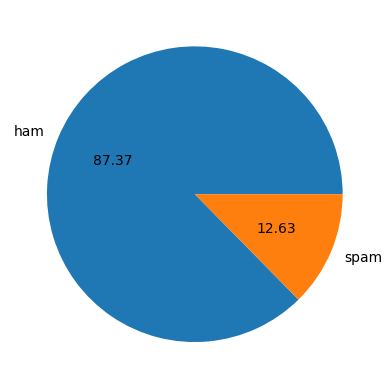

In [17]:
import matplotlib.pyplot as plt 
plt.pie(df['category'].value_counts() , labels=['ham','spam'],autopct="%0.2f")
plt.show()

### getting nltk so we can analyse the text properly

In [18]:
import nltk 

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kswap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### takin in the value of characters in each msg

In [20]:
df['char_count'] = df['text'].apply(len)

In [21]:
df.head(5)

,category,text,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### word count thru the nltk 

In [22]:
df['word_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,category,text,char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


### sentence count thru the nltk 

In [24]:
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df[['char_count' , 'word_count' , 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### checking the max values of the word , char and sentence count in both ham and spam

In [26]:
#ham 
df[df['category'] == 0][['char_count' , 'word_count' , 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#spam 
df[df['category'] == 1][['char_count', 'word_count' , 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### plotting the graphs of all the value to see clear comparison and distribution

In [28]:
import seaborn as sns 

<Axes: xlabel='char_count', ylabel='Count'>

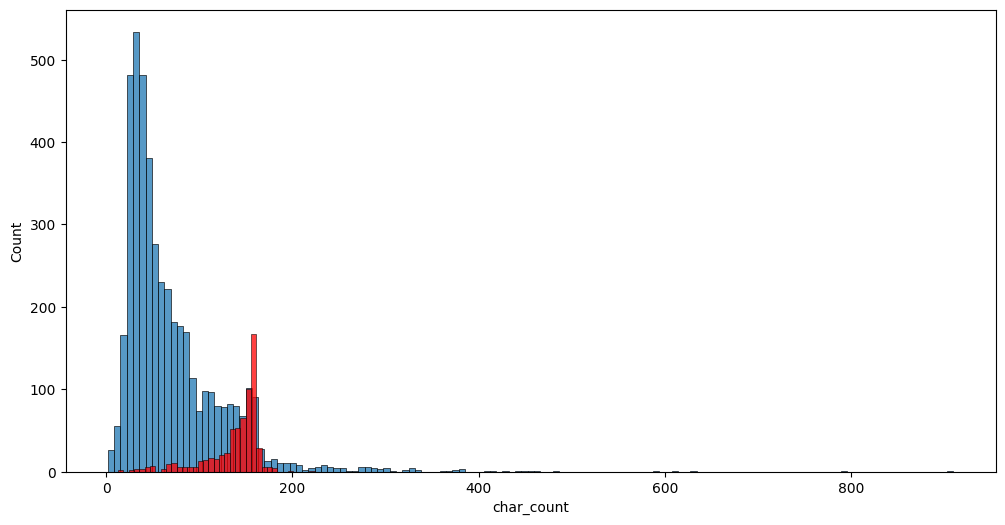

In [29]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['category'] == 0]['char_count'])
sns.histplot(df[df['category']==1]['char_count'] , color = 'red')

<Axes: xlabel='word_count', ylabel='Count'>

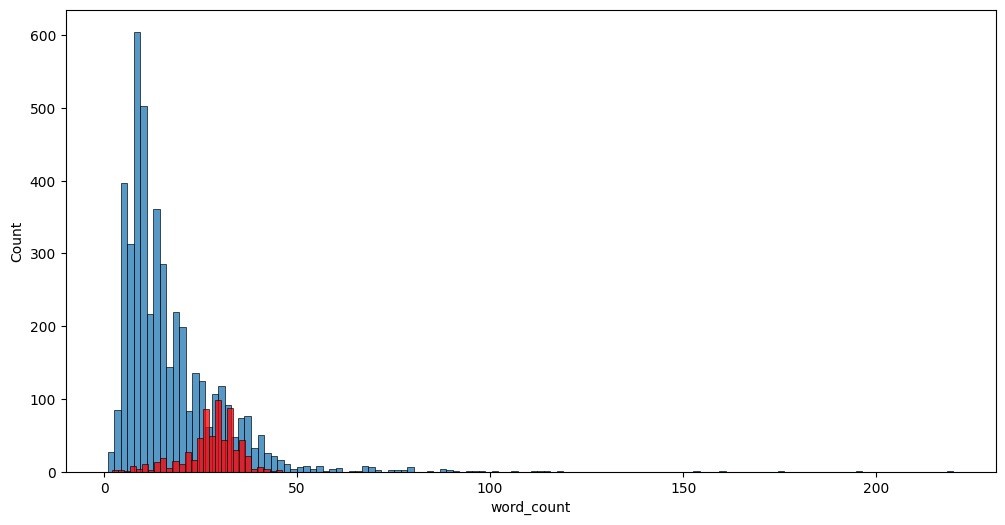

In [30]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['category'] == 0]['word_count'])
sns.histplot(df[df['category'] == 1]['word_count'] , color = 'red')

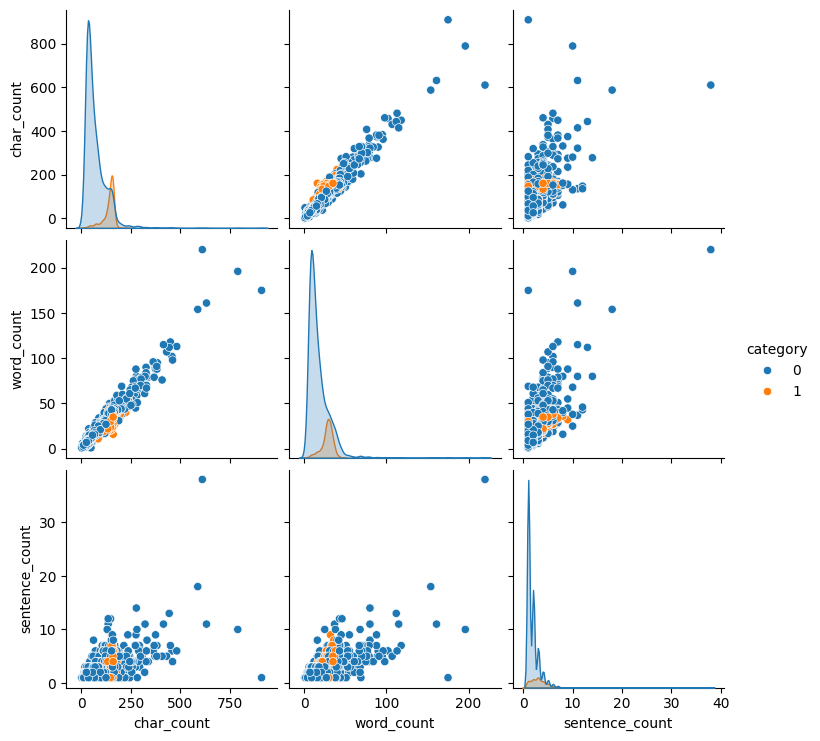

In [31]:
sns.pairplot(df , hue = 'category')

### Heatmap to see the correlation 

In [32]:
num_categories = df[['category' , 'char_count' , 'word_count' , 'sentence_count']]

In [33]:
num_categories

,category,char_count,word_count,sentence_count
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


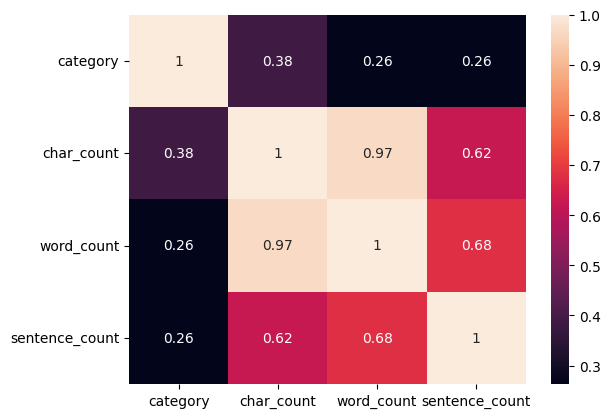

In [34]:
sns.heatmap(num_categories.corr() , annot = True)
plt.show()

### gonna compress the sentences and change it lower cases

In [35]:
from nltk.corpus import stopwords 
import string 

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    

In [38]:
df['text'][25]

"Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol"

In [39]:
transform_text(df['text'][25])

'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol'

In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

In [41]:
df.head(5)

,category,text,char_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Word Cloud to see the top words

In [42]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = 'black')

In [43]:
spam_wc = wc.generate(df[df['category'] == 1]['transformed_text'].str.cat(sep=" "))

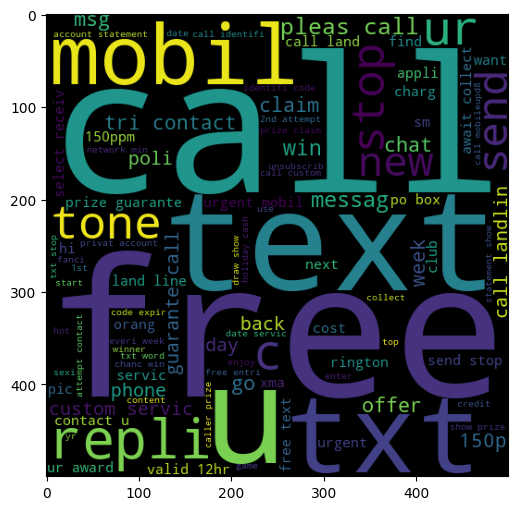

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['category']==0]['transformed_text'].str.cat(sep = " "))

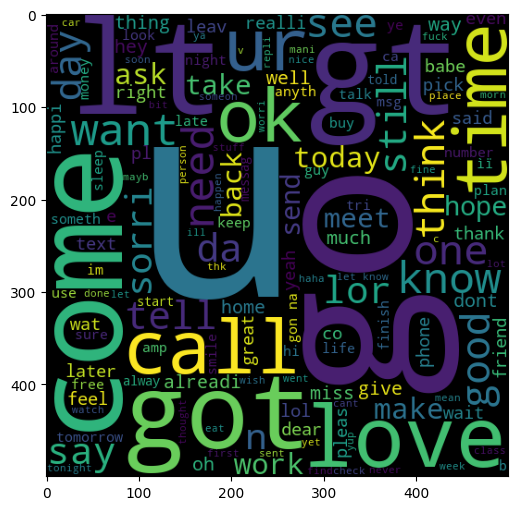

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

### Obtaining the top 30 words used and plotting them on barplot

In [47]:
spam_corpus = []
for msg in df[df['category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

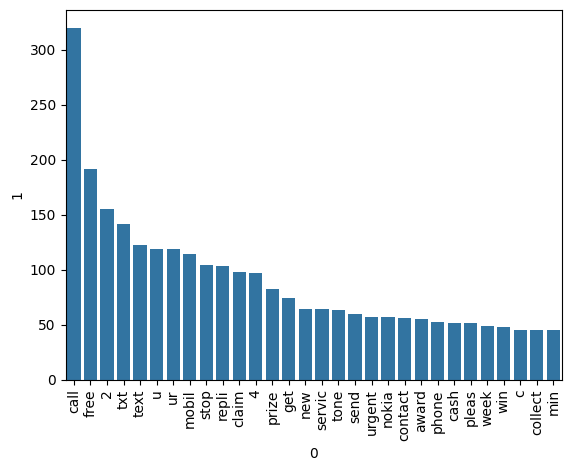

In [49]:
from collections import Counter 

sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus = []

for msg in df[df['category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35404

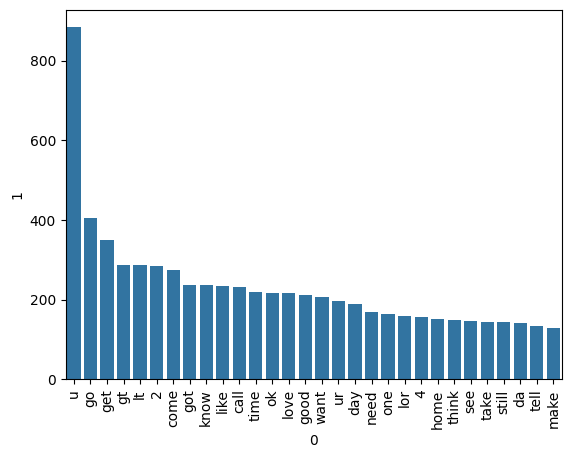

In [52]:
from collections import Counter

sns.barplot( x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
df.head()

,category,text,char_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Building 

### Converting text to numbers

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [55]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5169, 6708)

In [57]:
y = df['category'].values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB 
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [63]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [64]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### Lets check on different text vectorization method (tfid)

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [134]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [135]:
y = df['category'].values

In [104]:
#wasnt optima
##from sklearn.preprocessing import  MinMaxScaler 
##scaler = MinMaxScaler()
##X = scaler.fit_transform(X)

In [136]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 2)

In [69]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [137]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [71]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [72]:
#### Significant improvement in the precision after ***tfidf in mnb ****

### Trying other models than the NB 

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel = 'sigmoid' , gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear' , penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50 , random_state = 2)
gbc = GradientBoostingClassifier(n_estimators = 50 , random_state= 2)
xgb = XGBClassifier(n_estimators = 50 , random_state = 2)


In [75]:
clfs = {
    'SVC' : svc,
    'KN'  : knc,
    'MultinomialNB' : mnb,
    'DecisionTree'  : dtc,
    'LogisticR' : lrc,
    'RandomForest' : rfc,
    'GradientBC' : gbc,
    'XGB' : xgb
}

### Function to train the model and return the accuracy and precision score

In [106]:
def train_clfs(clf , X_train , y_train , X_test ,y_test):
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    
    return accuracy,precision
    

In [77]:
train_clfs(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

### getting all the scores and putting them in dataframe 

In [107]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy , current_precision = train_clfs(clf , X_train ,y_train , X_test , y_test)
    
    print('For' , name)
    print('Accuracy -' , current_accuracy)
    print('Precision -' , current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    


For SVC
Accuracy - 0.9690522243713733
Precision - 0.9274193548387096
For KN
Accuracy - 0.9052224371373307
Precision - 0.9761904761904762
For MultinomialNB
Accuracy - 0.9787234042553191
Precision - 0.9461538461538461
For DecisionTree
Accuracy - 0.9313346228239845
Precision - 0.8252427184466019
For LogisticR
Accuracy - 0.9671179883945842
Precision - 0.9642857142857143
For RandomForest
Accuracy - 0.9758220502901354
Precision - 0.9829059829059829
For GradientBC
Accuracy - 0.9468085106382979
Precision - 0.9191919191919192
For XGB
Accuracy - 0.9671179883945842
Precision - 0.9262295081967213


In [80]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy': accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision' , ascending=False)

In [84]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

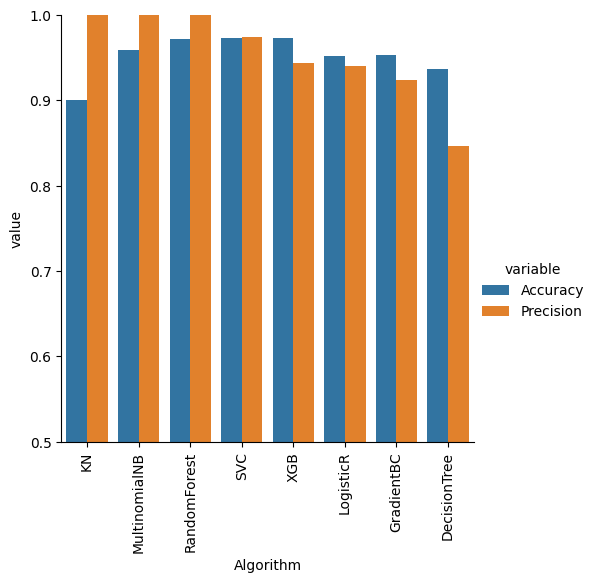

In [85]:
sns.catplot(x = 'Algorithm' , y ='value' ,
           hue = 'variable' , data=performance_df1 , kind = 'bar')
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

### changing and limiting the max features to 3000 in tfid

In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys() , 'Accuracy_maxft_3000' :accuracy_scores , 'Precision_maxft_3000' : precision_scores}).sort_values('Precision_maxft_3000' , ascending=False)

In [100]:
performance_df.merge(temp_df , on ='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_maxft_3000,Precision_maxft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,MultinomialNB,0.959381,1.000000,0.970986,1.000000
2,RandomForest,0.971954,1.000000,0.975822,0.982906
3,SVC,0.972921,0.974138,0.975822,0.974790
4,XGB,0.972921,0.943548,0.967118,0.926230
5,LogisticR,0.951644,0.940000,0.958414,0.970297
6,GradientBC,0.952611,0.923810,0.946809,0.919192
7,DecisionTree,0.936170,0.846154,0.928433,0.820000


In [108]:
## trying scaling with MinMaxScaler (didnt use standardscaler cus it gives negative values and thats not accepted by NB)

In [109]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys() , 'Accuracy_Scaling' :accuracy_scores , 'Precision_Scaling' : precision_scores}).sort_values('Precision_Scaling' , ascending=False)

In [110]:
new_df_scaled = performance_df.merge(temp_df, on = 'Algorithm')

In [111]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_Scaling,Precision_Scaling
0,KN,0.900387,1.000000,0.905222,0.976190
1,MultinomialNB,0.959381,1.000000,0.978723,0.946154
2,RandomForest,0.971954,1.000000,0.975822,0.982906
3,SVC,0.972921,0.974138,0.969052,0.927419
4,XGB,0.972921,0.943548,0.967118,0.926230
5,LogisticR,0.951644,0.940000,0.967118,0.964286
6,GradientBC,0.952611,0.923810,0.946809,0.919192
7,DecisionTree,0.936170,0.846154,0.931335,0.825243


### we can see in this the precision fell so its not optimal to go with this

## Making Voting Classifier

In [119]:
svc = SVC(kernel = 'sigmoid' , gamma = 1.0 , probability = True)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators = 50 , random_state = 2)

from sklearn.ensemble import VotingClassifier

In [120]:
voting = VotingClassifier(estimators=[('svm' , svc) , ('nb' , mnb) , ('rf' , rfc)] , voting = 'soft')

In [121]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [122]:
y_pred = voting.predict(X_test)
print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred))

0.9777562862669246
0.9831932773109243


### Still not better than NB 
## Trying Stacking 

In [127]:
estimators = [('svm' , svc) , ('nb' , mnb) , ('rf' , rfc)]
final_estimator = RandomForestClassifier()

In [128]:
from sklearn.ensemble import StackingClassifier

In [130]:
clf = StackingClassifier(estimators = estimators , final_estimator = final_estimator)

In [131]:
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred))

0.97678916827853
0.9318181818181818


## We can see from all the training that Multinomial Naive Bayes performed the best so we will be taking that model 

In [132]:
import pickle

In [138]:
pickle.dump(tfidf, open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))